In [2]:
import sys
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.nn as nn
import lightning.pytorch as pl
from pytorch_lightning import Trainer
from lightning.pytorch.loggers import TensorBoardLogger
import tensorboard

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the root directory
root_directory = os.path.abspath(os.path.join(current_dir, '..'))

# Add the root directory to the system path
sys.path.append(root_directory)

# Verify the path addition
from helper_utils import *
from U_Net import *
from U_Net_helper_functions import *
from TIF_dataset import *
from pytorch_lightning.loggers import TensorBoardLogger

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EXECUTE THE CELL BELOW TO PERFORM DATA AUGMENTATION

In [3]:
paths_01 =  list_files_in_folder(convert_backslashes_to_forward_slashes(r'C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\data\train\PhC-C2DH-U373\01'))
paths_01_labels =  list_files_in_folder(convert_backslashes_to_forward_slashes(r'C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\data\train\PhC-C2DH-U373\01_ST'))
paths_02 =  list_files_in_folder(convert_backslashes_to_forward_slashes(r'C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\data\train\PhC-C2DH-U373\02'))
paths_02_labels =  list_files_in_folder(convert_backslashes_to_forward_slashes(r'C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\data\train\PhC-C2DH-U373\02_ST'))

image_paths = paths_01 + paths_02
label_paths = paths_01_labels + paths_02_labels

output_folder_image = convert_backslashes_to_forward_slashes(r"C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\data\train\augmented_data_phc\imgs")
output_folder_label = convert_backslashes_to_forward_slashes(r"C:\Users\Dell\Documents\Heidelberg_hackaton_2\CellTrackingU-Net\data\train\augmented_data_phc\labels")
process_images(image_paths, label_paths, output_folder_image, output_folder_label, k=4)

For training the multimodal model

In [26]:
image_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_PhC\imgs")
label_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_PhC\labels")

image_paths_phc =  list_files_in_folder(image_folder_paths)
label_paths_phc =  list_files_in_folder(label_folder_paths)

image_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_DIC\imgs")
label_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_DIC\labels")

image_paths_dic =  list_files_in_folder(image_folder_paths)
label_paths_dic =  list_files_in_folder(label_folder_paths)

image_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_Flue_N2DL-HeLa\imgs")
label_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_Flue_N2DL-HeLa\labels")

image_paths_flo =  list_files_in_folder(image_folder_paths)
label_paths_flo =  list_files_in_folder(label_folder_paths)

In [27]:
image_paths =  image_paths_phc + image_paths_dic + image_paths_flo
label_paths =  label_paths_phc + label_paths_dic + label_paths_flo

In [19]:
#Uncoment this if You are NOT training a multimodal model

# image_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_PhC\imgs")
# label_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_PhC\labels")

# image_paths =  list_files_in_folder(image_folder_paths)
# label_paths =  list_files_in_folder(label_folder_paths)

validation_image_paths = image_paths[int(0.9 * len(image_paths)):]
validation_label_paths = label_paths[int(0.9 * len(image_paths)):]

image_paths =  image_paths[:int(0.9 * len(image_paths))]
label_paths =  label_paths[:int(0.9 * len(label_paths))]

In [29]:
train_dataset = TIF_dataset(image_paths, label_paths)
val_dataset = TIF_dataset(validation_image_paths, validation_label_paths)

train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=False)

In [30]:
#train with pytorch lightning

sizes = [1, 8, 16, 32, 128, 256]
lightning_model = UNet(sizes, kernel_size=7, padding = 3)

trainer = pl.Trainer(max_epochs=10)

trainer.fit(model = lightning_model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                | Params
-----------------------------------------------------
0 | bottom_path  | ModuleList          | 10.0 M
1 | top_path     | ModuleList          | 3.6 M 
2 | UpConvs      | ModuleList          | 333 K 
3 | pool         | MaxPool2d           | 0     
4 | bottom_block | Convolutional_Block | 9.6 M 
5 | loss_fn      | CrossEntropyLoss    | 0     
-----------------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.198    Total estimated model params size (MB)


Sanity Checking:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\Komputer\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.28it/s]   VALIDATION: Batch 1, loss 0.5346920490264893
                                                                           

c:\Users\Komputer\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 146/146 [02:35<00:00,  0.94it/s, v_num=45]   VALIDATION: Batch 0, loss 0.2584543824195862
   VALIDATION: Batch 1, loss 0.26786643266677856
   VALIDATION: Batch 2, loss 0.26179391145706177
   VALIDATION: Batch 3, loss 0.2728455066680908
   VALIDATION: Batch 4, loss 0.26342111825942993
   VALIDATION: Batch 5, loss 0.2527129054069519
Epoch 1: 100%|██████████| 146/146 [02:36<00:00,  0.94it/s, v_num=45]   VALIDATION: Batch 0, loss 0.4013541340827942
   VALIDATION: Batch 1, loss 0.5525450706481934
   VALIDATION: Batch 2, loss 0.4210948944091797
   VALIDATION: Batch 3, loss 0.5127426385879517
   VALIDATION: Batch 4, loss 0.3382045328617096
   VALIDATION: Batch 5, loss 0.26267555356025696
Epoch 2: 100%|██████████| 146/146 [02:37<00:00,  0.93it/s, v_num=45]   VALIDATION: Batch 0, loss 0.1208372488617897
   VALIDATION: Batch 1, loss 0.13197261095046997
   VALIDATION: Batch 2, loss 0.1273968368768692
   VALIDATION: Batch 3, loss 0.13423503935337067
   VALIDATION: Batch 4

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 146/146 [02:36<00:00,  0.93it/s, v_num=45]


In [31]:
val_loss = lightning_model.run_model_on_validation_dataloder(val_dataloader)
print(val_loss)

Zaczynam
licze output
licze loss
Zaczynam
licze output
licze loss
Zaczynam
licze output
licze loss
Zaczynam
licze output
licze loss
Zaczynam
licze output
licze loss
Zaczynam
licze output
licze loss
Avarage validation loss:  0.061463834096988045
0.061463834096988045


Save the model

In [32]:
# torch.save(lightning_model.state_dict(), convert_backslashes_to_forward_slashes(r'C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\saved_models\BIG_model_DIC'))
torch.save(lightning_model, convert_backslashes_to_forward_slashes(r'C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\saved_models\BIG_model_MULTIMODAL'))

SANITY CHECK: lets look at some examples

Model output


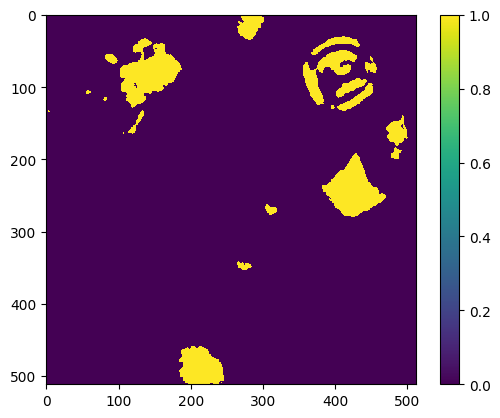

Label


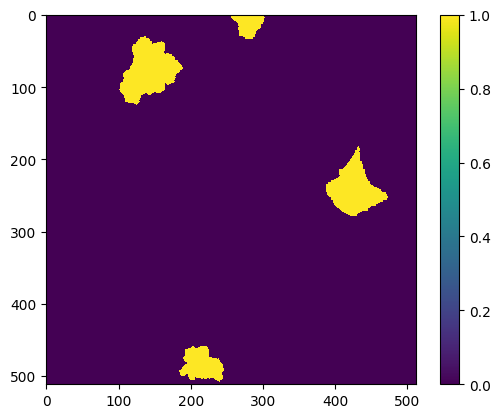

original image


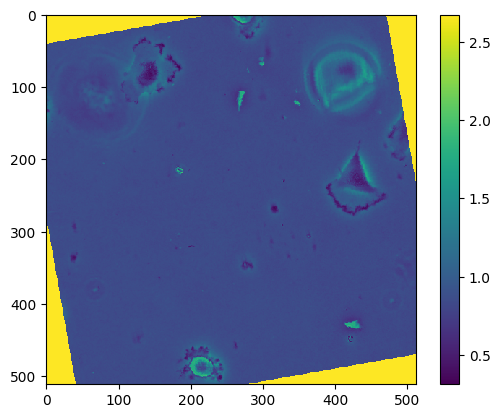

In [43]:
device = torch.device('cuda')

data, label = val_dataset[63]
data = data.to(device)
label = label.to(device)


lightning_model.eval()
with torch.no_grad():
    output = lightning_model(data.cpu().unsqueeze(dim = 0))
    model_return_numpy = channel_comparison(output.cpu())
    print('Model output')
    plot_heatmap(model_return_numpy)
    print('Label')
    plot_heatmap(label.cpu().squeeze().numpy())
    print('original image')
    plot_heatmap(data.cpu().squeeze().numpy())